In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [39]:
kidney_disease=pd.read_csv('/content/kidney_disease - kidney_disease.csv')

In [40]:
kidney_disease.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [41]:
kidney_disease = kidney_disease.drop('id', axis=1)

In [42]:
numeric_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in numeric_cols:
    kidney_disease[col] = pd.to_numeric(kidney_disease[col], errors='coerce')

In [43]:
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [45]:
categorical_cols = kidney_disease.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Remove whitespace
    kidney_disease[col] = kidney_disease[col].astype(str).str.strip()
    # Replace the string 'nan' with actual np.nan
    kidney_disease[col].replace('nan', np.nan, inplace=True)

/tmp/ipython-input-1212892357.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kidney_disease[col].replace('nan', np.nan, inplace=True)
/tmp/ipython-input-1212892357.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [46]:
numerical_to_impute = kidney_disease[numeric_cols].columns[kidney_disease[numeric_cols].isnull().any()].tolist()
categorical_to_impute = kidney_disease.select_dtypes(include=['object']).columns[kidney_disease.select_dtypes(include=['object']).isnull().any()].tolist()

In [47]:
for col in numerical_to_impute:
    median_val = kidney_disease[col].median()
    kidney_disease[col].fillna(median_val, inplace=True)

/tmp/ipython-input-1237940600.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kidney_disease[col].fillna(median_val, inplace=True)


In [49]:
for col in categorical_to_impute:
    mode_val = kidney_disease[col].mode()[0]
    kidney_disease[col].fillna(mode_val, inplace=True)

/tmp/ipython-input-4122684976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kidney_disease[col].fillna(mode_val, inplace=True)


/tmp/ipython-input-3250094275.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='hemo', data=kidney_disease, palette='viridis')


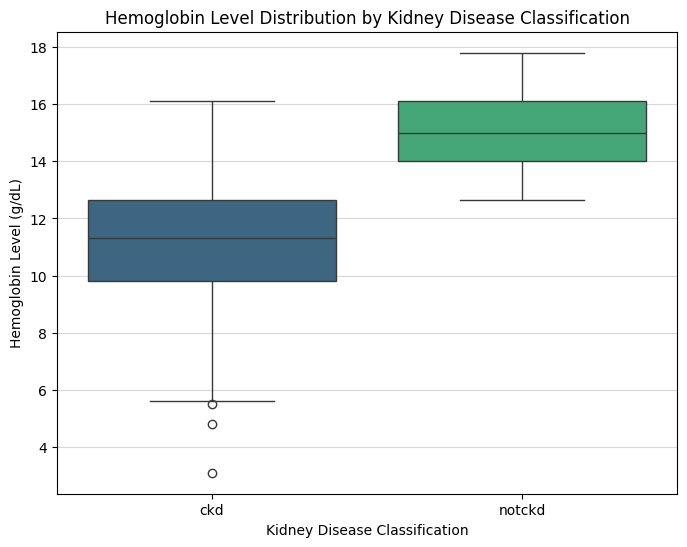

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='hemo', data=kidney_disease, palette='viridis')
plt.title('Hemoglobin Level Distribution by Kidney Disease Classification')
plt.xlabel('Kidney Disease Classification')
plt.ylabel('Hemoglobin Level (g/dL)')
plt.grid(axis='y', alpha=0.5)

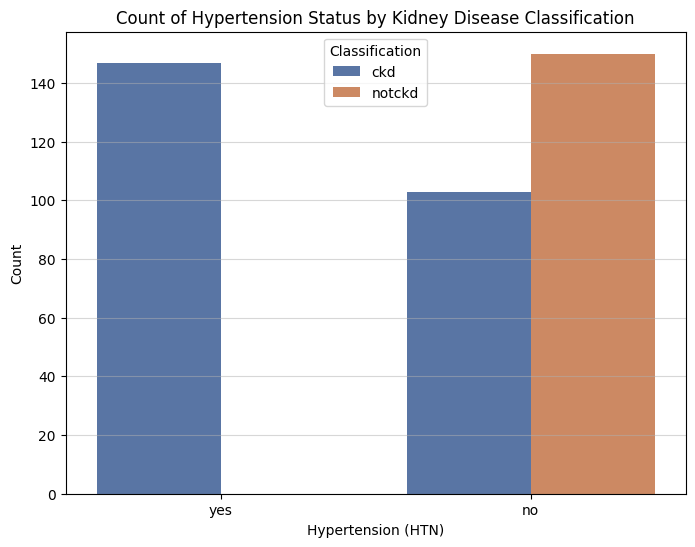

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='htn', hue='classification', data=kidney_disease, palette='deep')
plt.title('Count of Hypertension Status by Kidney Disease Classification')
plt.xlabel('Hypertension (HTN)')
plt.ylabel('Count')
plt.legend(title='Classification')
plt.grid(axis='y', alpha=0.5)

In [52]:
kidney_disease['classification'] = kidney_disease['classification'].replace({'ckd': 1, 'notckd': 0})

categorical_features = kidney_disease.select_dtypes(include=['object']).columns
kidney_disease = pd.get_dummies(kidney_disease, columns=categorical_features, drop_first=True)


/tmp/ipython-input-794950017.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney_disease['classification'] = kidney_disease['classification'].replace({'ckd': 1, 'notckd': 0})


In [55]:
x = kidney_disease.drop('classification', axis=1)
y = kidney_disease['classification']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [56]:

majority_class_count = y_train.value_counts().max()
minority_class_label = y_train.value_counts().idxmin()

In [59]:
x_train_minority = x_train[y_train == minority_class_label]
y_train_minority = y_train[y_train == minority_class_label]
x_train_majority = x_train[y_train != minority_class_label]
y_train_majority = y_train[y_train != minority_class_label]

x_train_minority_oversampled = x_train_minority.sample(
    n=majority_class_count,
    replace=True,
    random_state=42
)
y_train_minority_oversampled = pd.Series(
    minority_class_label,
    index=x_train_minority_oversampled.index
)

x_train_balanced = pd.concat([x_train_majority, x_train_minority_oversampled])
y_train_balanced = pd.concat([y_train_majority, y_train_minority_oversampled])

In [70]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_scaled, y_train_balanced)

RandomForestClassifier(random_state=42)

In [62]:
numerical_features = x_train_balanced.columns[:14]
scaler = StandardScaler()
x_train_scaled = x_train_balanced.copy()
x_test_scaled = x_test.copy()

x_train_scaled[numerical_features] = scaler.fit_transform(x_train_balanced[numerical_features])
x_test_scaled[numerical_features] = scaler.transform(x_test[numerical_features])

In [64]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train_balanced)
    y_pred = model.predict(x_test_scaled)

In [65]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [67]:
print(f"\n--- Model: {name} ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='binary'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model: Random Forest ---
Accuracy: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [71]:
kidney_disease_pickle = 'kidney_disease.pkl'
kidney_disease.to_pickle(kidney_disease_pickle)